#**Customer Churn Prediction using KNearest Neighbour Model**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Checking for null values:

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Checking for skewness:

In [6]:
data.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   



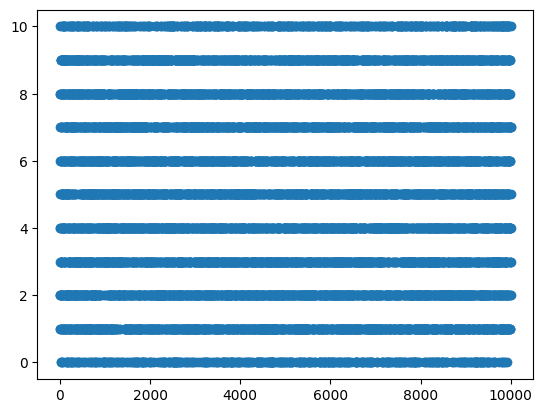

In [7]:
plt.scatter(data.index,data['Tenure'])
plt.show()

<Axes: ylabel='Tenure'>

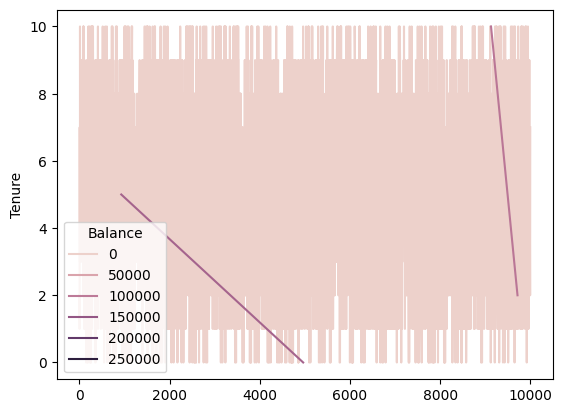

In [8]:
sns.lineplot(x=data.index,y=data['Tenure'],hue=data['Balance'])

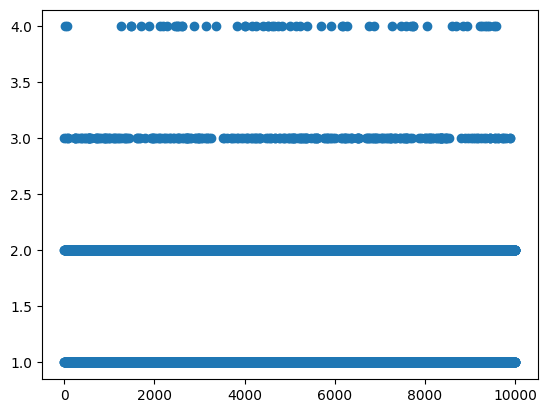

In [9]:
plt.scatter(data.index,data['NumOfProducts'])
plt.show()

<Axes: ylabel='NumOfProducts'>

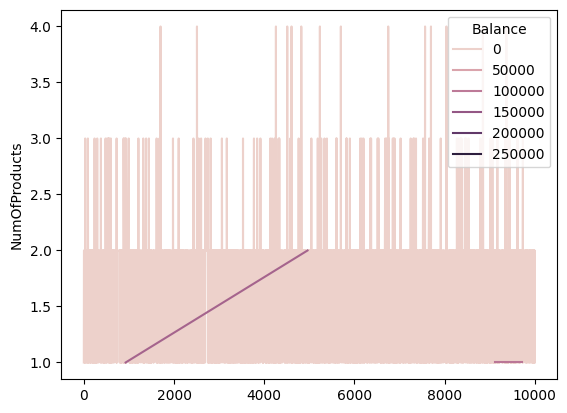

In [10]:
sns.lineplot(x=data.index,y=data['NumOfProducts'],hue=data['Balance'])

In [15]:
# Encode categorical variables
le = preprocessing.LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])


FEATURE SELECTION

In [16]:
# Select features and target variable
X = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = data['Exited']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# Example of tuning k value
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"k = {k}, Accuracy: {accuracy}")


k = 1, Accuracy: 0.804
k = 2, Accuracy: 0.84
k = 3, Accuracy: 0.837
k = 4, Accuracy: 0.8385
k = 5, Accuracy: 0.8355
k = 6, Accuracy: 0.838
k = 7, Accuracy: 0.8405
k = 8, Accuracy: 0.8425
k = 9, Accuracy: 0.843
k = 10, Accuracy: 0.8425
k = 11, Accuracy: 0.8465
k = 12, Accuracy: 0.842
k = 13, Accuracy: 0.845
k = 14, Accuracy: 0.845
k = 15, Accuracy: 0.8425
k = 16, Accuracy: 0.8425
k = 17, Accuracy: 0.845
k = 18, Accuracy: 0.8405
k = 19, Accuracy: 0.844
k = 20, Accuracy: 0.8425


In [20]:
# Train the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=20)

In [21]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [23]:
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8425

Confusion Matrix:
[[1581   26]
 [ 289  104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1607
           1       0.80      0.26      0.40       393

    accuracy                           0.84      2000
   macro avg       0.82      0.62      0.65      2000
weighted avg       0.84      0.84      0.81      2000



**Increase the accuracy:**

In [24]:
# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21)}

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=k, weights='distance')

In [26]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(n_neighbors=20, weights='distance'),
             param_grid={'n_neighbors': range(1, 21)})

In [27]:
# Get the best parameters
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

Best k: 13


In [28]:
# Use the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best model: {accuracy}")

Accuracy with best model: 0.846
